In [1]:
import pandas as pd 
import numpy as np 

from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split 

In [2]:
X, y = load_iris(return_X_y=True)

In [3]:
#generating noise, and adding it to X 
noise = np.random.RandomState(42).uniform(0, 0.1, size=(X.shape[0], 20))
X = np.hstack((X, noise))


In [5]:
#splitting dataset 

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [13]:
#Univariate feature Selection 
#with F-test for feature scoring 

from sklearn.feature_selection import SelectKBest, f_classif 

selector = SelectKBest(f_classif, k=4)
selector.fit(X_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()

In [7]:
scores

array([3.72189526e-01, 1.92112431e-01, 9.98924450e-01, 1.00000000e+00,
       1.61525527e-02, 1.78421693e-03, 3.36072503e-02, 9.34126229e-04,
       8.38039241e-03, 4.46122522e-03, 2.47289009e-03, 3.04121968e-03,
       4.16671859e-03, 6.37306186e-03, 2.79418271e-03, 5.46727836e-03,
       9.36025883e-04, 8.67509750e-03, 2.39127975e-03, 6.33147019e-04,
       1.10538184e-03, 7.61511411e-03, 1.15995689e-03, 2.40400211e-02])

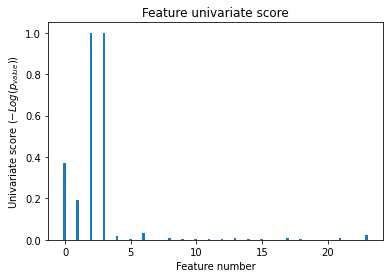

In [9]:
import matplotlib.pyplot as plt 
%matplotlib inline 

X_indices = np.arange(X.shape[-1])
plt.figure(1)
plt.clf()
plt.bar(X_indices - 0.05, scores, width = 0.2)
plt.title("Feature univariate score")
plt.xlabel("Feature number")
plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
plt.show()

Compare it with SVMs

In [10]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.svm import LinearSVC 

clf = make_pipeline(MinMaxScaler(), LinearSVC())
clf.fit(X_train, y_train)
print("Classification accuracy without selecting features: {:.3f}".format(clf.score(X_test, y_test)))
svm_weights = np.abs(clf[-1].coef_).sum(axis=0)
svm_weights /= svm_weights.sum()

Classification accuracy without selecting features: 0.789


After "univariate feature selection"

In [14]:
clf_selected = make_pipeline(SelectKBest(f_classif, k=4), MinMaxScaler(), LinearSVC())
clf_selected.fit(X_train, y_train)

print("classification accuracy after univariate feature selection: {:.3f}".format(clf_selected.score(X_test, y_test)))

svm_weights_selected = np.abs(clf_selected[-1].coef_).sum(axis=0)
svm_weights_selected /= svm_weights_selected.sum()

classification accuracy after univariate feature selection: 0.868


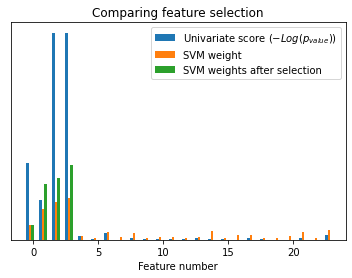

In [15]:
plt.bar(X_indices - 0.45, scores, width=0.2, label=r"Univariate score ($-Log(p_{value})$)")

plt.bar(X_indices - 0.25, svm_weights, width=0.2, label="SVM weight")

plt.bar(
    X_indices[selector.get_support()] - 0.05,
    svm_weights_selected,
    width=0.2,
    label="SVM weights after selection",
)

plt.title("Comparing feature selection")
plt.xlabel("Feature number")
plt.yticks(())
plt.axis("tight")
plt.legend(loc="upper right")
plt.show()